In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8')
sns.set_palette("colorblind")

## Group into stay and go

focused_lease: 28878 rows and 45 columns

Transaction Category Counts:
transaction_category
Go      21864
Stay     5433
TBD      1581
Name: count, dtype: int64


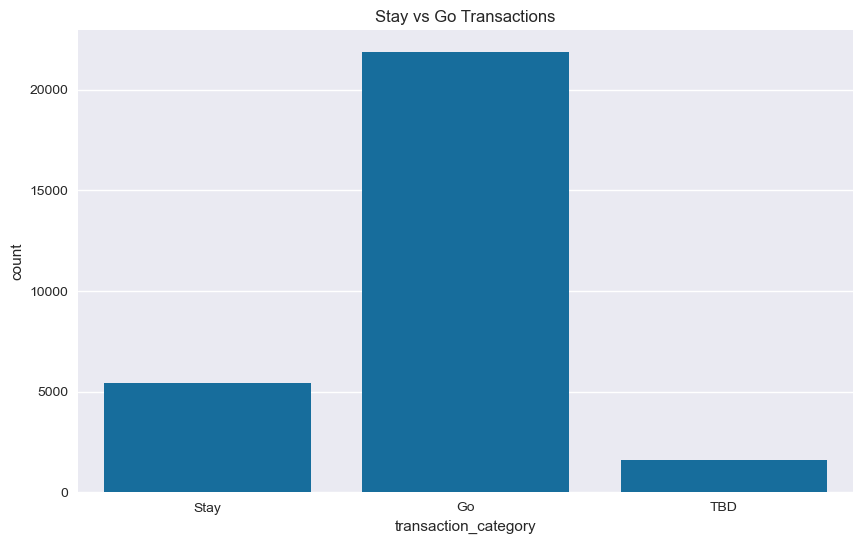

In [13]:
focused_lease = pd.read_csv('../Datasets/focused_lease.csv')

print(f"focused_lease: {focused_lease.shape[0]} rows and {focused_lease.shape[1]} columns")
focused_lease.head()

go_categories = ["New", "Relocation"]
stay_categories = ["Renewal", "Expansion", "Restructure", "Extension", "Renewal and Expansion"]
    
focused_lease["transaction_category"] = focused_lease["transaction_type"].apply(
    lambda x: "Go" if x in go_categories else ("Stay" if x in stay_categories else "TBD")
)
    
print("\nTransaction Category Counts:")
print(focused_lease['transaction_category'].value_counts())
    
plt.figure(figsize=(10, 6))
sns.countplot(x='transaction_category', data=focused_lease)
plt.title('Stay vs Go Transactions')
plt.show()

## Remove TBD rows

After removing TBD transactions:
focused_lease: 27297 rows and 46 columns
transaction_category
Go      21864
Stay     5433
Name: count, dtype: int64


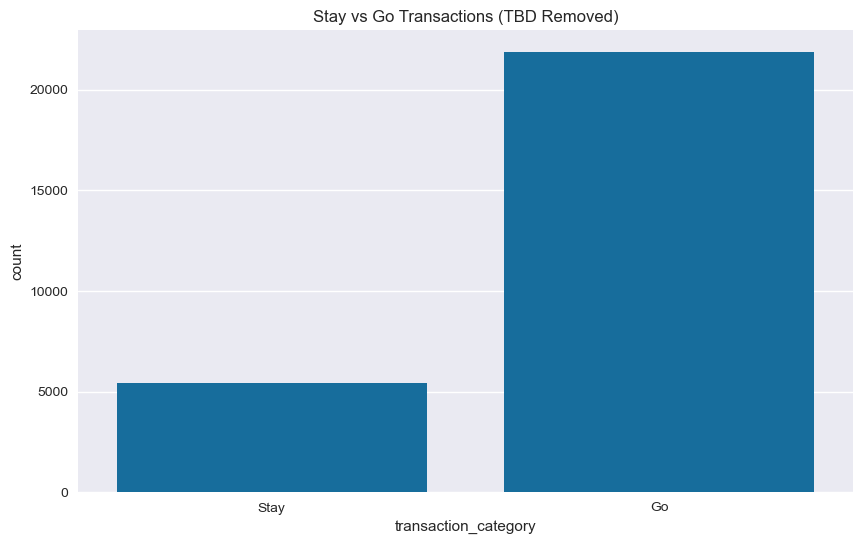

In [14]:
focused_lease = focused_lease[focused_lease['transaction_category'] != "TBD"]

print("After removing TBD transactions:")
print(f"focused_lease: {focused_lease.shape[0]} rows and {focused_lease.shape[1]} columns")
print(focused_lease['transaction_category'].value_counts())

plt.figure(figsize=(10, 6))
sns.countplot(x='transaction_category', data=focused_lease)
plt.title('Stay vs Go Transactions (TBD Removed)')
plt.show()

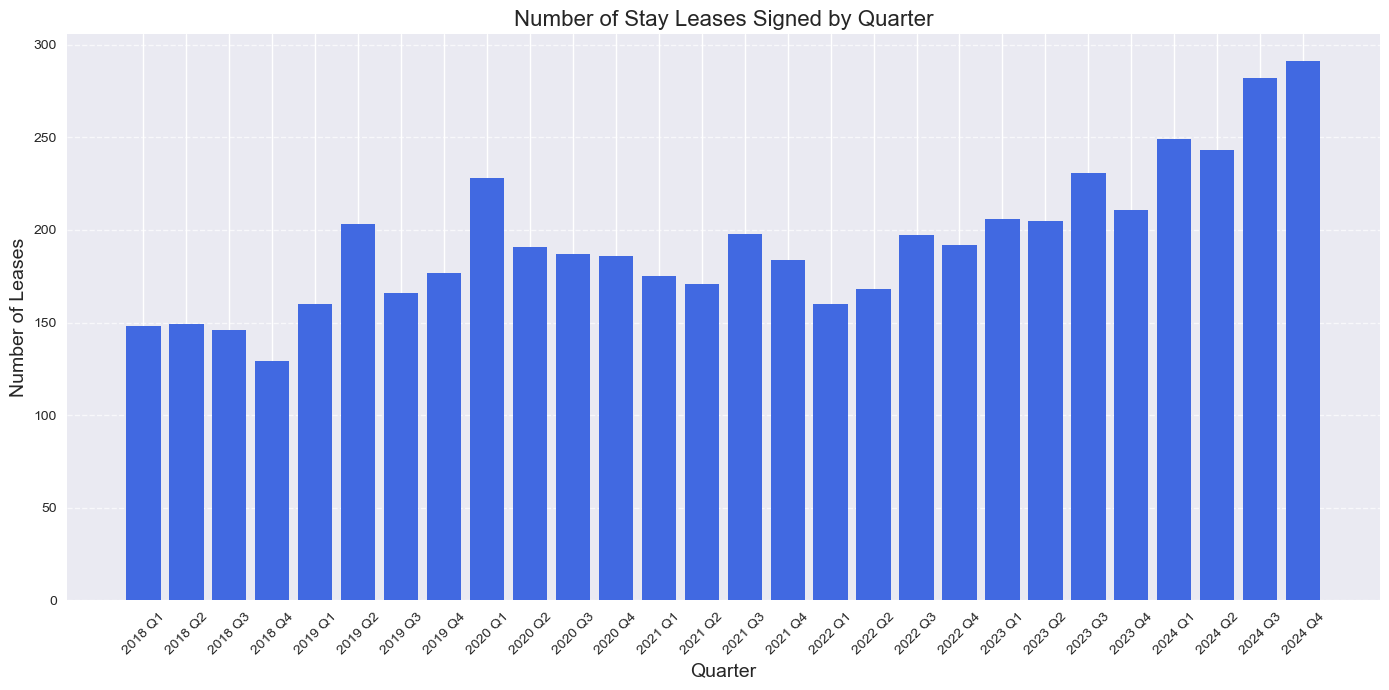

In [15]:
# Filter to only keep Stay transactions
stay_data = focused_lease[focused_lease["transaction_category"] == "Stay"].copy()

stay_data['time_period'] = stay_data['year'].astype(str) + ' ' + stay_data['quarter'].astype(str)

stay_counts = stay_data.groupby(['year', 'quarter', 'time_period']).size().reset_index(name='count')
stay_counts = stay_counts.sort_values(['year', 'quarter'])

plt.figure(figsize=(14, 7))
plt.bar(stay_counts['time_period'], stay_counts['count'], color='royalblue')
plt.title('Number of Stay Leases Signed by Quarter', fontsize=16)
plt.xlabel('Quarter', fontsize=14)
plt.ylabel('Number of Leases', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# print("Stay leases by quarter:")
# print(stay_counts[['time_period', 'count']].to_string(index=False))

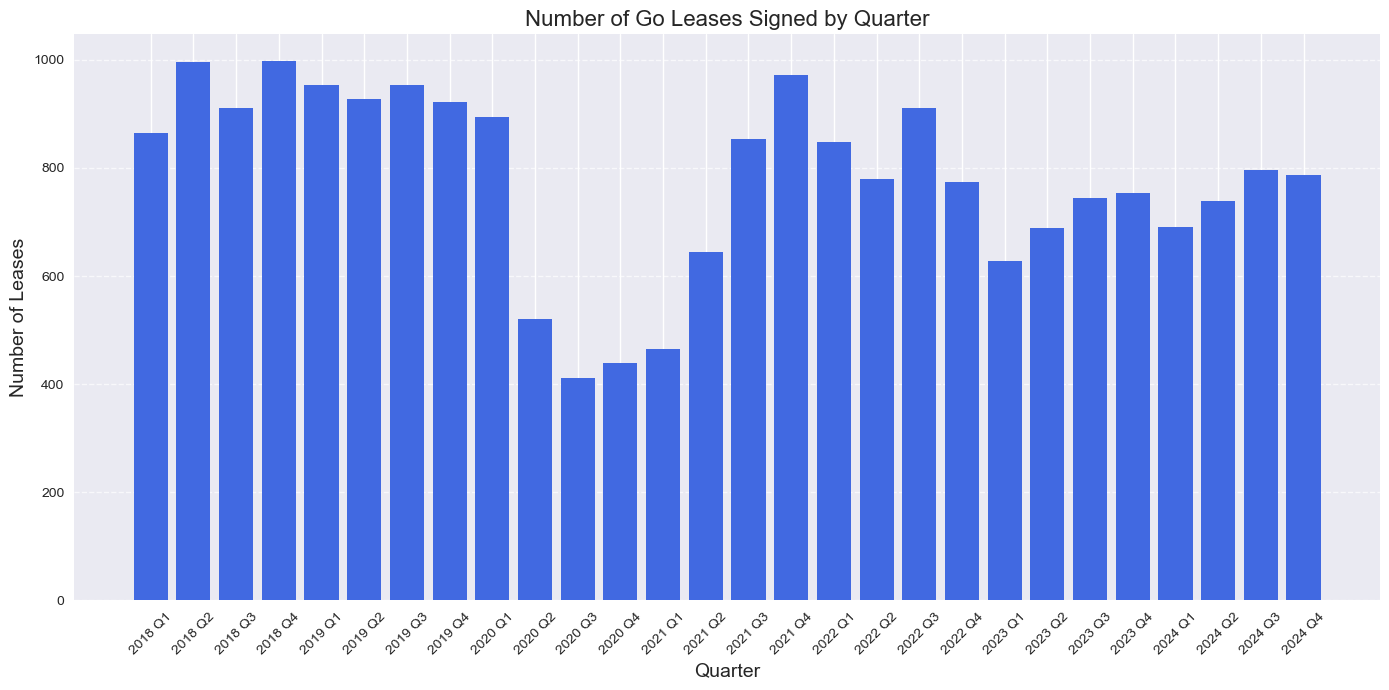

In [16]:
go_data = focused_lease[focused_lease["transaction_category"] == "Go"].copy()

go_data['time_period'] = go_data['year'].astype(str) + ' ' + go_data['quarter'].astype(str)

go_counts = go_data.groupby(['year', 'quarter', 'time_period']).size().reset_index(name='count')
go_counts = go_counts.sort_values(['year', 'quarter'])

plt.figure(figsize=(14, 7))
plt.bar(go_counts['time_period'], go_counts['count'], color='royalblue')
plt.title('Number of Go Leases Signed by Quarter', fontsize=16)
plt.xlabel('Quarter', fontsize=14)
plt.ylabel('Number of Leases', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# print("Go leases by quarter:")
# print(go_counts[['time_period', 'count']].to_string(index=False))

Number of unique states: 22

Top 10 states by number of Go leases:
state
CA    3950
TX    3429
NY    2792
MA    1357
IL    1317
Name: count, dtype: int64


<Figure size 1500x800 with 0 Axes>

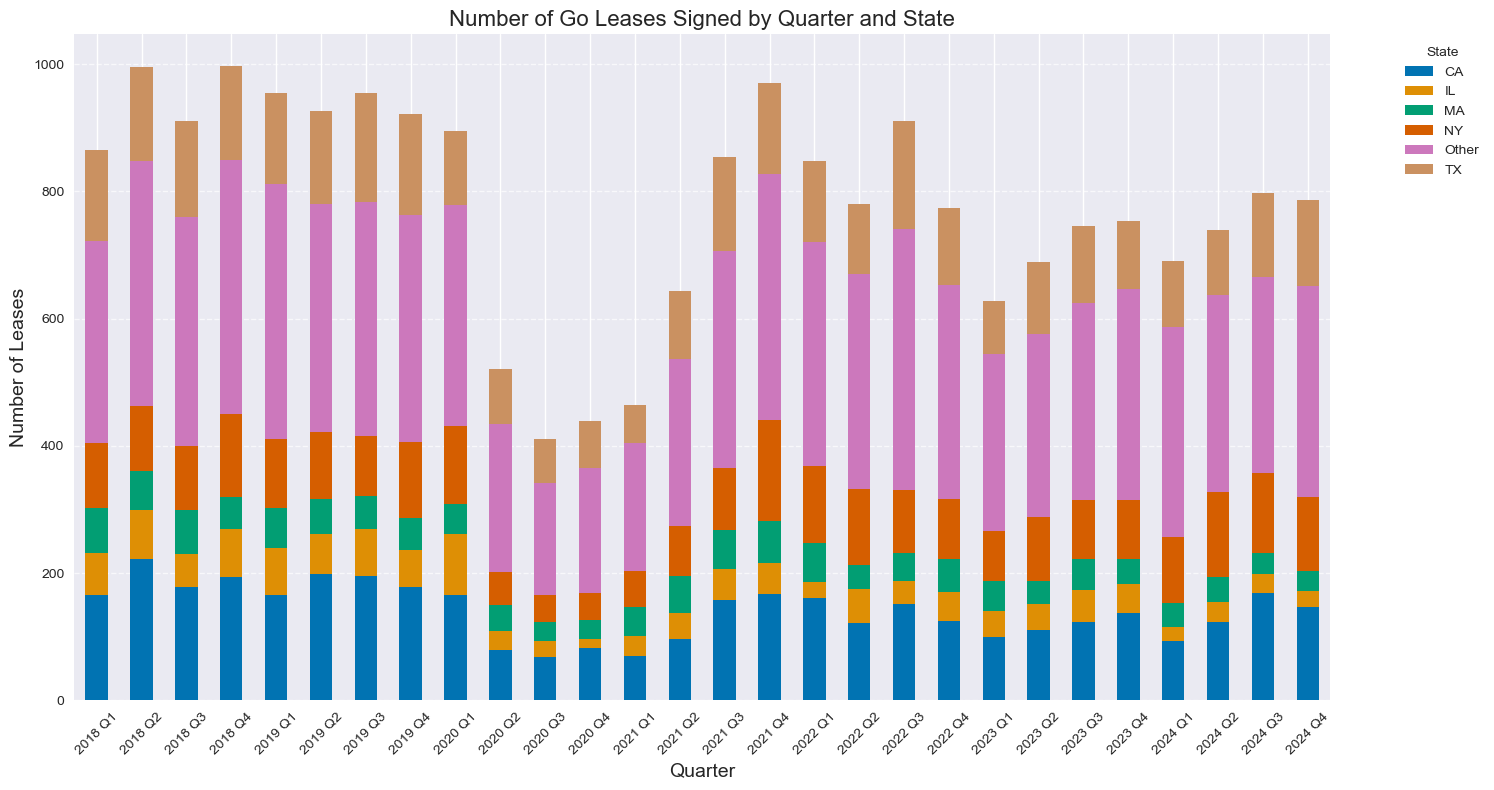

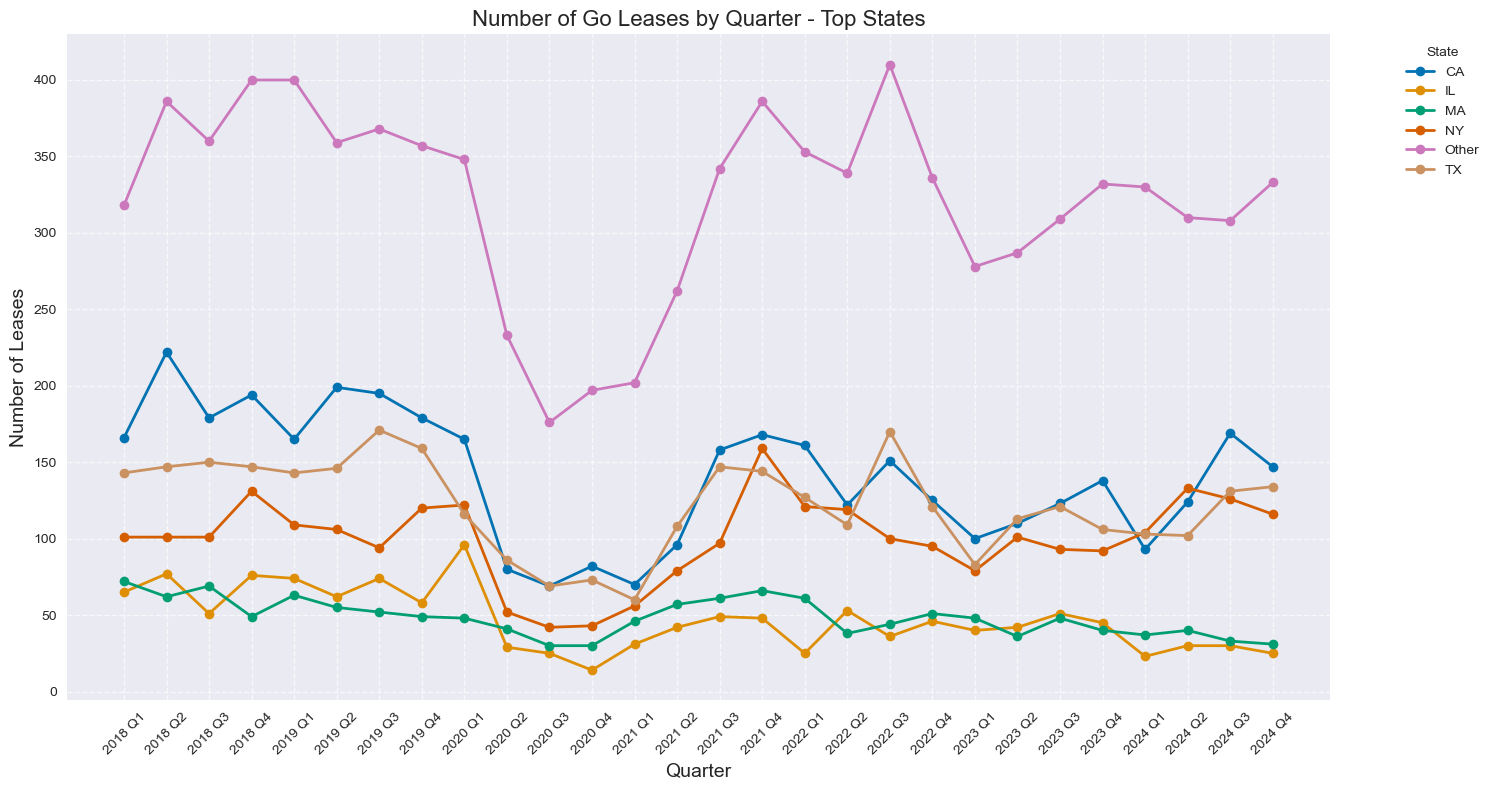

In [17]:
go_data['time_period'] = go_data['year'].astype(str) + ' ' + go_data['quarter'].astype(str)

go_counts_by_state = go_data.groupby(['year', 'quarter', 'time_period', 'state']).size().reset_index(name='count')
go_counts_by_state = go_counts_by_state.sort_values(['year', 'quarter'])

num_states = go_data['state'].nunique()
print(f"Number of unique states: {num_states}")

top_states = go_data['state'].value_counts().nlargest(5)
print("\nTop 10 states by number of Go leases:")
print(top_states)


top_state_names = top_states.index.tolist()
go_data['state_grouped'] = go_data['state'].apply(lambda x: x if x in top_state_names else 'Other')
    
go_counts_grouped = go_data.groupby(['year', 'quarter', 'time_period', 'state_grouped']).size().reset_index(name='count')
go_counts_grouped = go_counts_grouped.sort_values(['year', 'quarter'])
    
pivot_data = go_counts_grouped.pivot_table(
    index='time_period', 
    columns='state_grouped', 
    values='count', 
    aggfunc='sum'
).fillna(0)

time_periods = go_data.sort_values(['year', 'quarter'])['time_period'].unique()
pivot_data = pivot_data.reindex(time_periods)

plt.figure(figsize=(15, 8))
pivot_data.plot(kind='bar', stacked=True, figsize=(15, 8))
plt.title('Number of Go Leases Signed by Quarter and State', fontsize=16)
plt.xlabel('Quarter', fontsize=14)
plt.ylabel('Number of Leases', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 8))
for column in pivot_data.columns[:6]: 
    plt.plot(pivot_data.index, pivot_data[column], marker='o', linewidth=2, label=column)
    
plt.title('Number of Go Leases by Quarter - Top States', fontsize=16)
plt.xlabel('Quarter', fontsize=14)
plt.ylabel('Number of Leases', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Number of unique states: 22

Top 10 states by number of Stay leases:
state
NY    1085
CA     705
VA     638
TX     442
DC     434
Name: count, dtype: int64


<Figure size 1500x800 with 0 Axes>

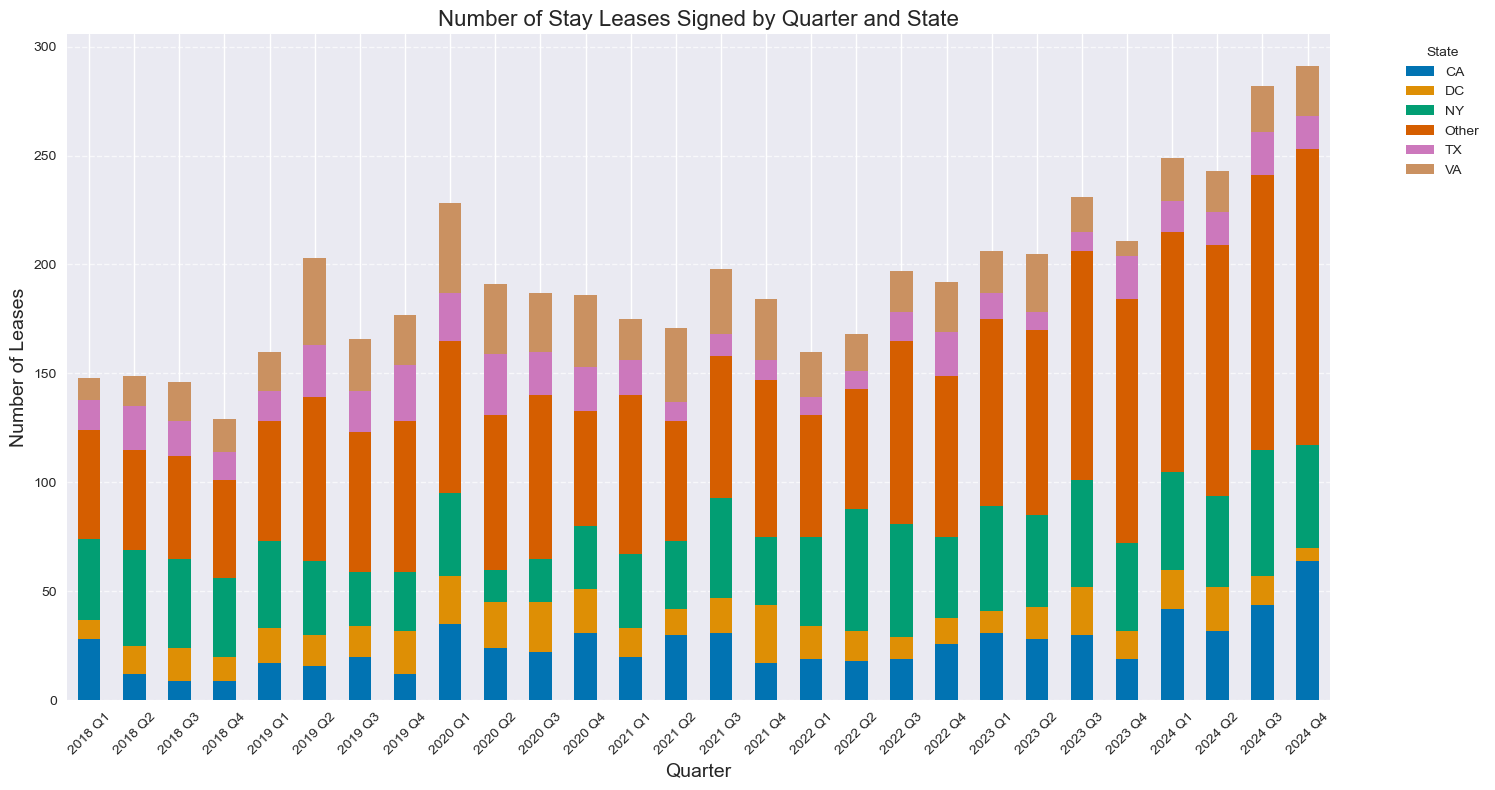

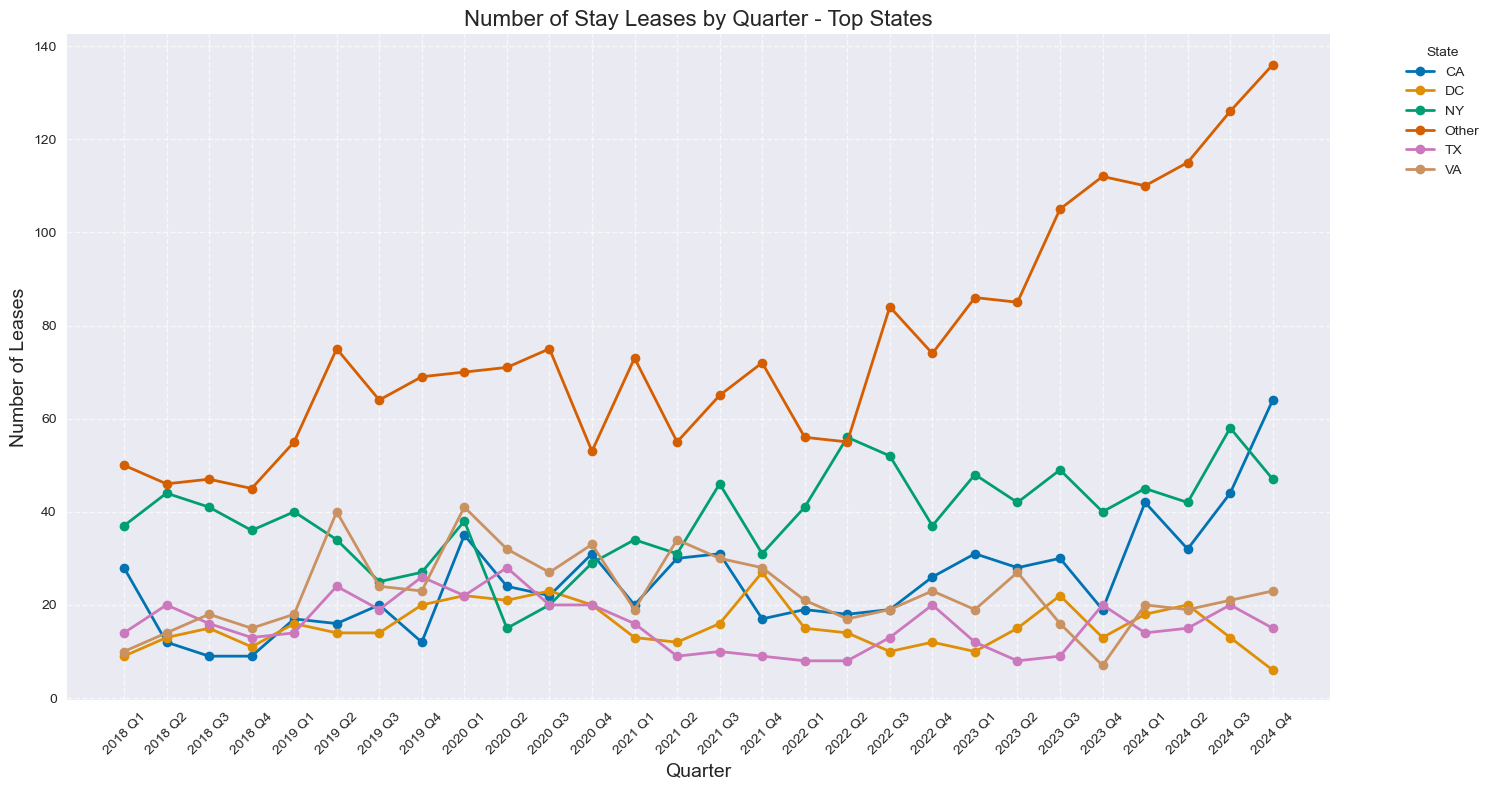

In [18]:
stay_data['time_period'] = stay_data['year'].astype(str) + ' ' + stay_data['quarter'].astype(str)

stay_counts_by_state = stay_data.groupby(['year', 'quarter', 'time_period', 'state']).size().reset_index(name='count')
stay_counts_by_state = stay_counts_by_state.sort_values(['year', 'quarter'])

num_states = stay_data['state'].nunique()
print(f"Number of unique states: {num_states}")

top_states = stay_data['state'].value_counts().nlargest(5)
print("\nTop 10 states by number of Stay leases:")
print(top_states)


top_state_names = top_states.index.tolist()
stay_data['state_grouped'] = stay_data['state'].apply(lambda x: x if x in top_state_names else 'Other')
    
stay_counts_grouped = stay_data.groupby(['year', 'quarter', 'time_period', 'state_grouped']).size().reset_index(name='count')
stay_counts_grouped = stay_counts_grouped.sort_values(['year', 'quarter'])
    
pivot_data = stay_counts_grouped.pivot_table(
    index='time_period', 
    columns='state_grouped', 
    values='count', 
    aggfunc='sum'
).fillna(0)

time_periods = stay_data.sort_values(['year', 'quarter'])['time_period'].unique()
pivot_data = pivot_data.reindex(time_periods)

plt.figure(figsize=(15, 8))
pivot_data.plot(kind='bar', stacked=True, figsize=(15, 8))
plt.title('Number of Stay Leases Signed by Quarter and State', fontsize=16)
plt.xlabel('Quarter', fontsize=14)
plt.ylabel('Number of Leases', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 8))
for column in pivot_data.columns[:6]: 
    plt.plot(pivot_data.index, pivot_data[column], marker='o', linewidth=2, label=column)
    
plt.title('Number of Stay Leases by Quarter - Top States', fontsize=16)
plt.xlabel('Quarter', fontsize=14)
plt.ylabel('Number of Leases', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Top 5 states: ['CA', 'TX', 'NY', 'MA', 'IL']


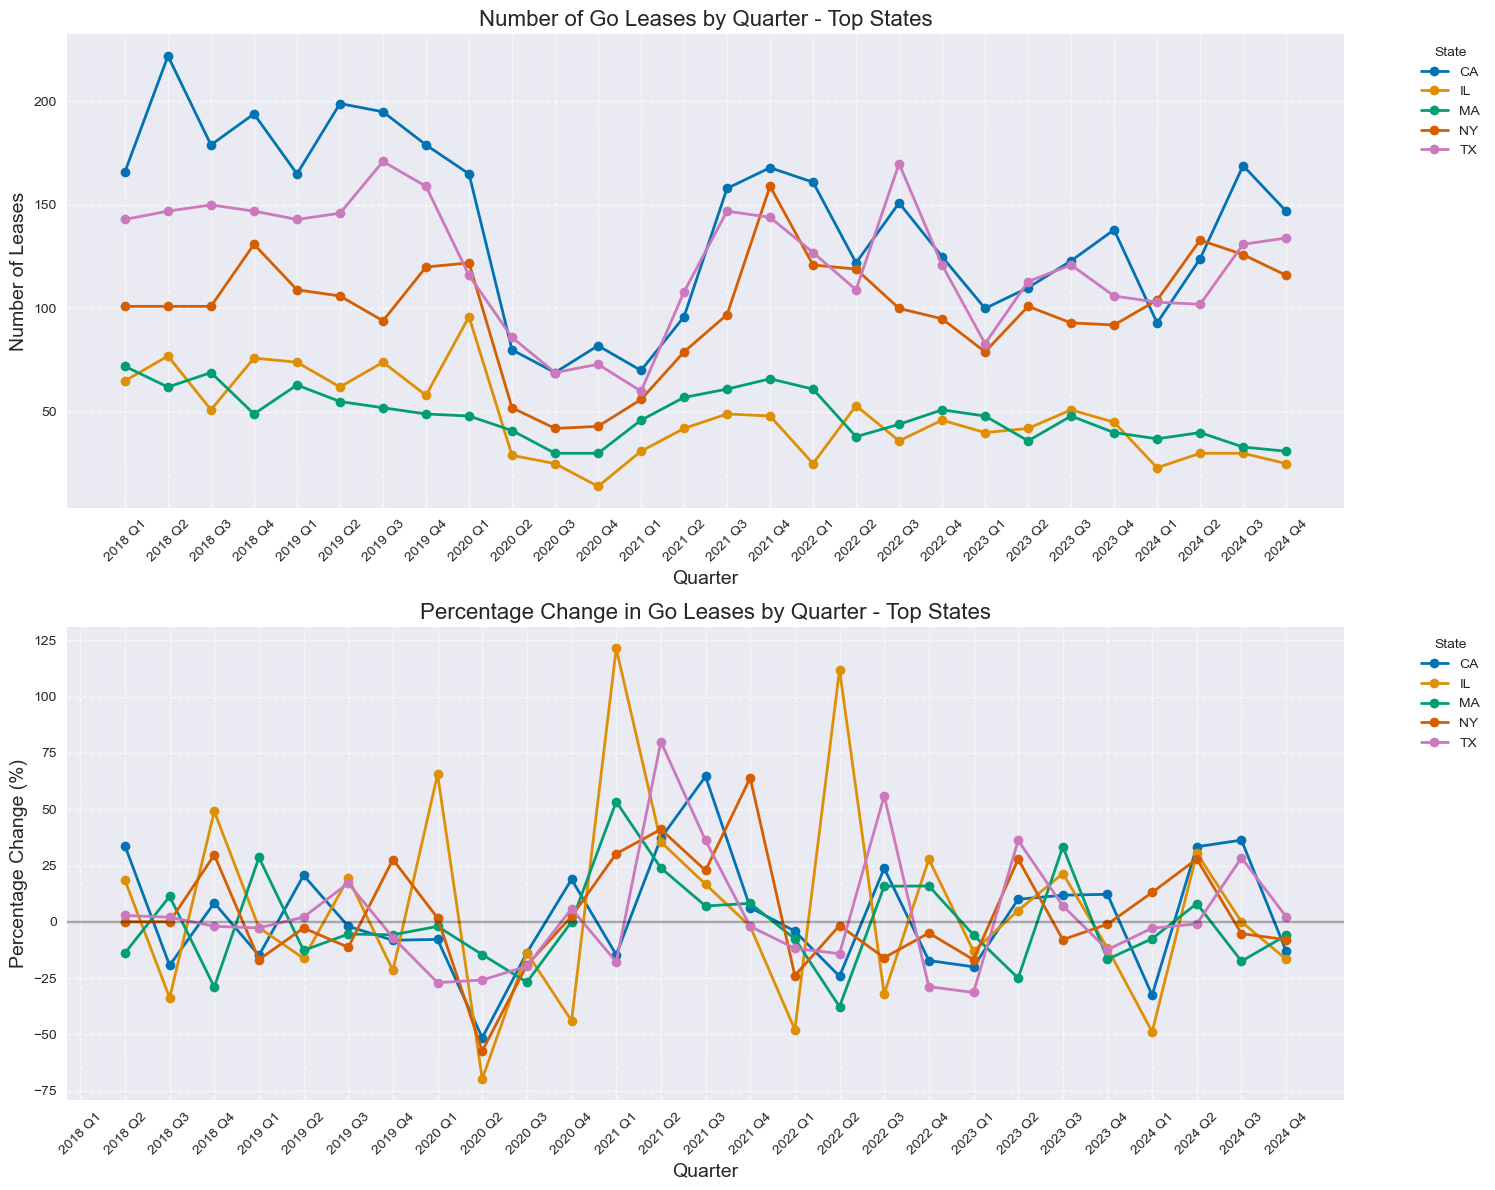

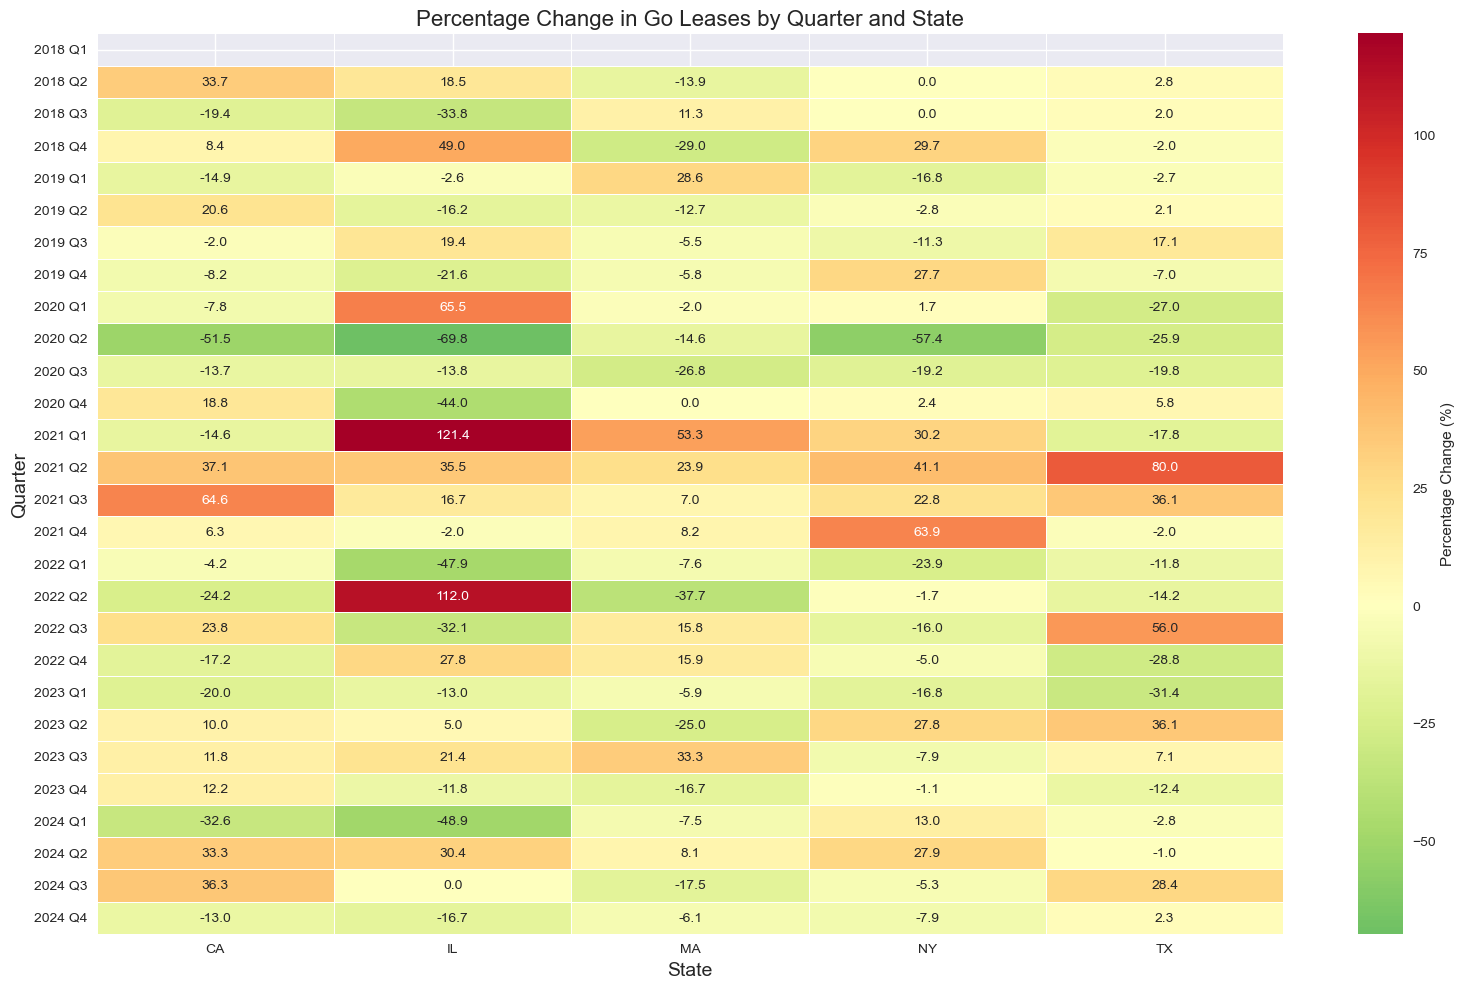


Percentage change in Go leases by quarter:
state          CA     IL    MA    NY    TX
time_period                               
2018 Q1       NaN    NaN   NaN   NaN   NaN
2018 Q2      33.7   18.5 -13.9   0.0   2.8
2018 Q3     -19.4  -33.8  11.3   0.0   2.0
2018 Q4       8.4   49.0 -29.0  29.7  -2.0
2019 Q1     -14.9   -2.6  28.6 -16.8  -2.7
2019 Q2      20.6  -16.2 -12.7  -2.8   2.1
2019 Q3      -2.0   19.4  -5.5 -11.3  17.1
2019 Q4      -8.2  -21.6  -5.8  27.7  -7.0
2020 Q1      -7.8   65.5  -2.0   1.7 -27.0
2020 Q2     -51.5  -69.8 -14.6 -57.4 -25.9
2020 Q3     -13.7  -13.8 -26.8 -19.2 -19.8
2020 Q4      18.8  -44.0   0.0   2.4   5.8
2021 Q1     -14.6  121.4  53.3  30.2 -17.8
2021 Q2      37.1   35.5  23.9  41.1  80.0
2021 Q3      64.6   16.7   7.0  22.8  36.1
2021 Q4       6.3   -2.0   8.2  63.9  -2.0
2022 Q1      -4.2  -47.9  -7.6 -23.9 -11.8
2022 Q2     -24.2  112.0 -37.7  -1.7 -14.2
2022 Q3      23.8  -32.1  15.8 -16.0  56.0
2022 Q4     -17.2   27.8  15.9  -5.0 -28.8
2023 Q1   

In [19]:
go_data = focused_lease[focused_lease["transaction_category"] == "Go"].copy()

go_data['time_period'] = go_data['year'].astype(str) + ' ' + go_data['quarter'].astype(str)

go_counts_by_state = go_data.groupby(['year', 'quarter', 'time_period', 'state']).size().reset_index(name='count')
go_counts_by_state = go_counts_by_state.sort_values(['year', 'quarter'])

top_states = go_data['state'].value_counts().nlargest(5).index.tolist()
print(f"Top 5 states: {top_states}")

go_counts_top_states = go_counts_by_state[go_counts_by_state['state'].isin(top_states)]

pivot_data = go_counts_top_states.pivot_table(
    index='time_period', 
    columns='state', 
    values='count', 
    aggfunc='sum'
).fillna(0)

time_periods = go_data.sort_values(['year', 'quarter'])['time_period'].unique()
pivot_data = pivot_data.reindex(time_periods)

pct_change = pivot_data.pct_change() * 100

pct_change = pct_change.replace([np.inf, -np.inf], np.nan)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))

for column in pivot_data.columns:
    ax1.plot(pivot_data.index, pivot_data[column], marker='o', linewidth=2, label=column)

ax1.set_title('Number of Go Leases by Quarter - Top States', fontsize=16)
ax1.set_xlabel('Quarter', fontsize=14)
ax1.set_ylabel('Number of Leases', fontsize=14)
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True, linestyle='--', alpha=0.7)
ax1.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')

for column in pct_change.columns:
    ax2.plot(pct_change.index, pct_change[column], marker='o', linewidth=2, label=column)

ax2.set_title('Percentage Change in Go Leases by Quarter - Top States', fontsize=16)
ax2.set_xlabel('Quarter', fontsize=14)
ax2.set_ylabel('Percentage Change (%)', fontsize=14)
ax2.tick_params(axis='x', rotation=45)
ax2.grid(True, linestyle='--', alpha=0.7)
ax2.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
ax2.axhline(y=0, color='k', linestyle='-', alpha=0.3) 

plt.tight_layout()
plt.show()

plt.figure(figsize=(16, 10))
sns.heatmap(pct_change, cmap="RdYlGn_r", center=0, annot=True, fmt=".1f", 
            linewidths=0.5, cbar_kws={'label': 'Percentage Change (%)'})
plt.title('Percentage Change in Go Leases by Quarter and State', fontsize=16)
plt.ylabel('Quarter', fontsize=14)
plt.xlabel('State', fontsize=14)
plt.tight_layout()
plt.show()

print("\nPercentage change in Go leases by quarter:")
print(pct_change.round(1))

Total Go leases in IL: 1317


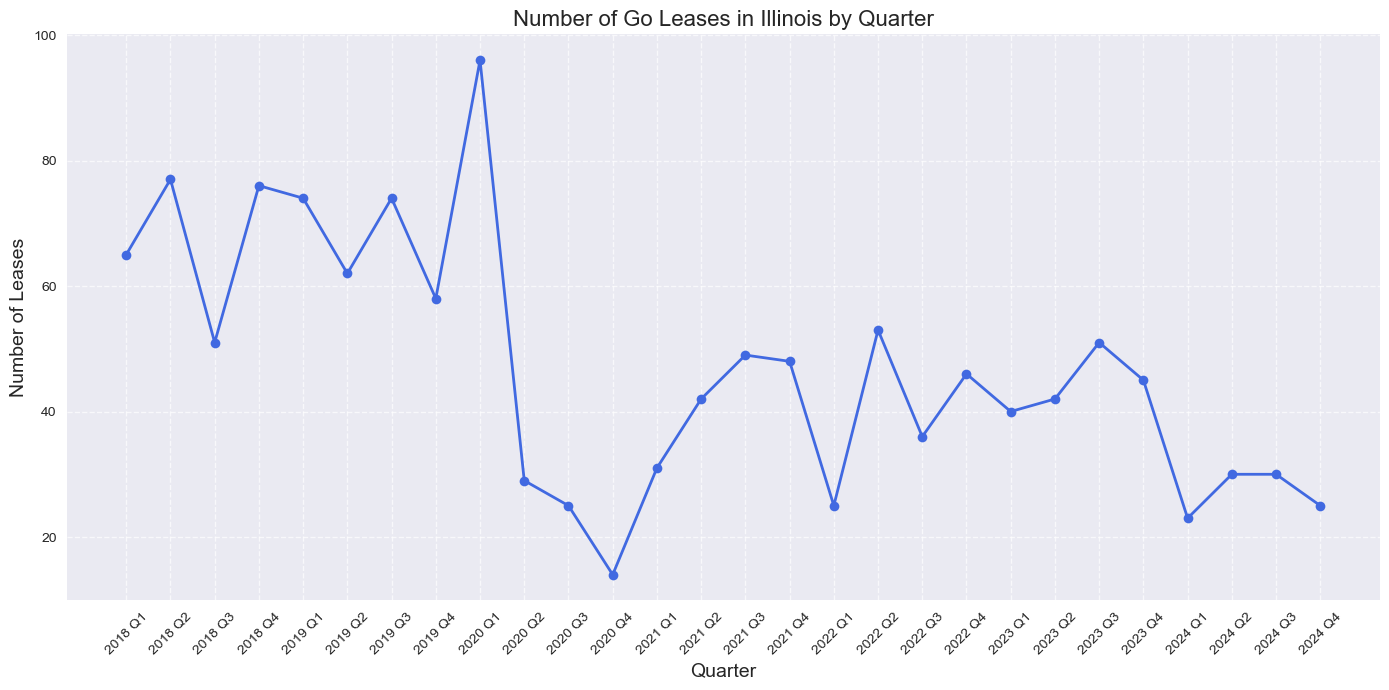

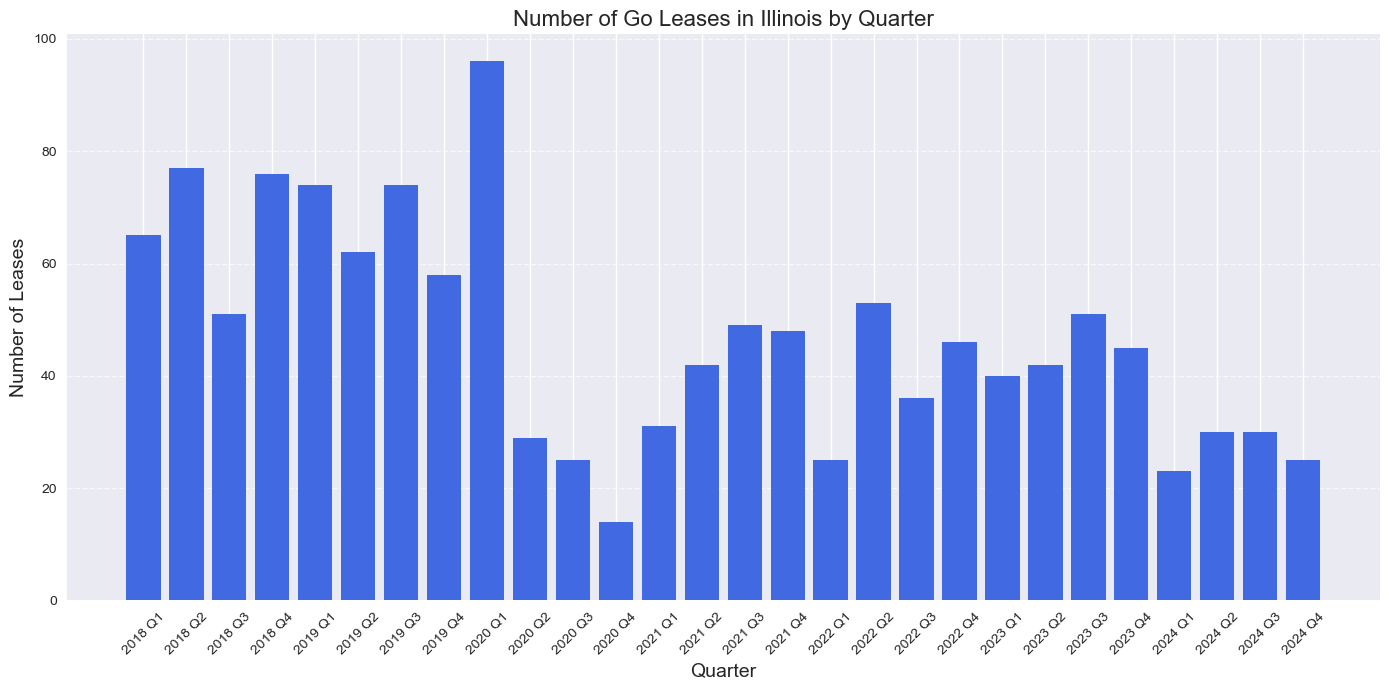

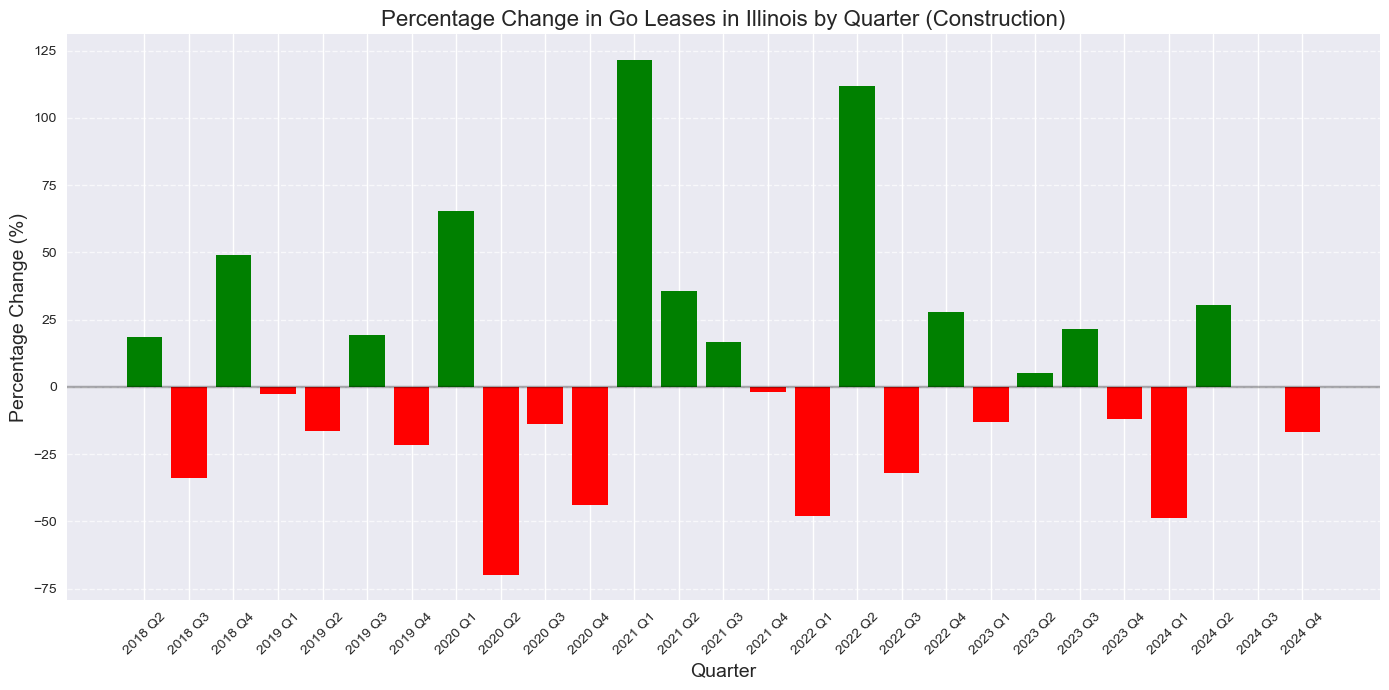


Percentage change in Go leases by quarter in IL:
time_period  count pct_change
    2018 Q1     65        NaN
    2018 Q2     77      18.5%
    2018 Q3     51     -33.8%
    2018 Q4     76      49.0%
    2019 Q1     74      -2.6%
    2019 Q2     62     -16.2%
    2019 Q3     74      19.4%
    2019 Q4     58     -21.6%
    2020 Q1     96      65.5%
    2020 Q2     29     -69.8%
    2020 Q3     25     -13.8%
    2020 Q4     14     -44.0%
    2021 Q1     31     121.4%
    2021 Q2     42      35.5%
    2021 Q3     49      16.7%
    2021 Q4     48      -2.0%
    2022 Q1     25     -47.9%
    2022 Q2     53     112.0%
    2022 Q3     36     -32.1%
    2022 Q4     46      27.8%
    2023 Q1     40     -13.0%
    2023 Q2     42       5.0%
    2023 Q3     51      21.4%
    2023 Q4     45     -11.8%
    2024 Q1     23     -48.9%
    2024 Q2     30      30.4%
    2024 Q3     30       0.0%
    2024 Q4     25     -16.7%


In [ ]:
# Filter for Go leases in Illinois
il_go_data = focused_lease[(focused_lease["transaction_category"] == "Go") & 
                          (focused_lease["state"] == "IL")].copy()

# Create time period for sorting and display
il_go_data['time_period'] = il_go_data['year'].astype(str) + ' ' + il_go_data['quarter'].astype(str)

# Summary information
print(f"Total Go leases in IL: {len(il_go_data)}")

# Count leases by quarter
il_go_counts = il_go_data.groupby(['year', 'quarter', 'time_period']).size().reset_index(name='count')
il_go_counts = il_go_counts.sort_values(['year', 'quarter'])

# Plot the trend
plt.figure(figsize=(14, 7))
plt.plot(il_go_counts['time_period'], il_go_counts['count'], marker='o', linewidth=2, color='royalblue')
plt.title('Number of Go Leases in Illinois by Quarter (Construction)', fontsize=16)
plt.xlabel('Quarter', fontsize=14)
plt.ylabel('Number of Leases', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Bar chart version
plt.figure(figsize=(14, 7))
plt.bar(il_go_counts['time_period'], il_go_counts['count'], color='royalblue')
plt.title('Number of Go Leases in Illinois by Quarter', fontsize=16)
plt.xlabel('Quarter', fontsize=14)
plt.ylabel('Number of Leases', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Calculate percentage change
if len(il_go_counts) > 1:
    il_go_counts['pct_change'] = il_go_counts['count'].pct_change() * 100
    
    plt.figure(figsize=(14, 7))
    plt.bar(il_go_counts['time_period'][1:], il_go_counts['pct_change'][1:], 
            color=il_go_counts['pct_change'][1:].map(lambda x: 'green' if x >= 0 else 'red'))
    plt.title('Percentage Change in Go Leases in Illinois by Quarter (Construction)', fontsize=16)
    plt.xlabel('Quarter', fontsize=14)
    plt.ylabel('Percentage Change (%)', fontsize=14)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print("\nPercentage change in Go leases by quarter in IL:")
    print(il_go_counts[['time_period', 'count', 'pct_change']].to_string(index=False, 
                                                                       formatters={'pct_change': '{:.1f}%'.format}))

Total Go leases in IL (Construction industry): 26


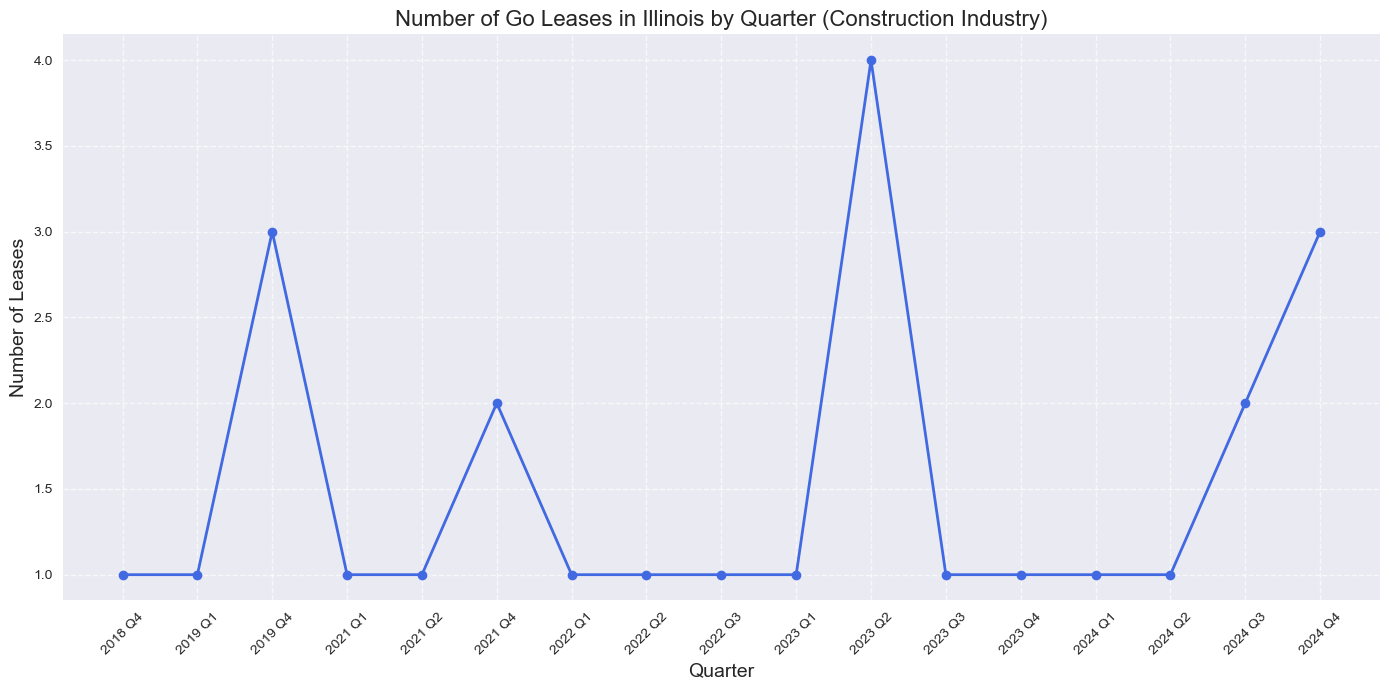

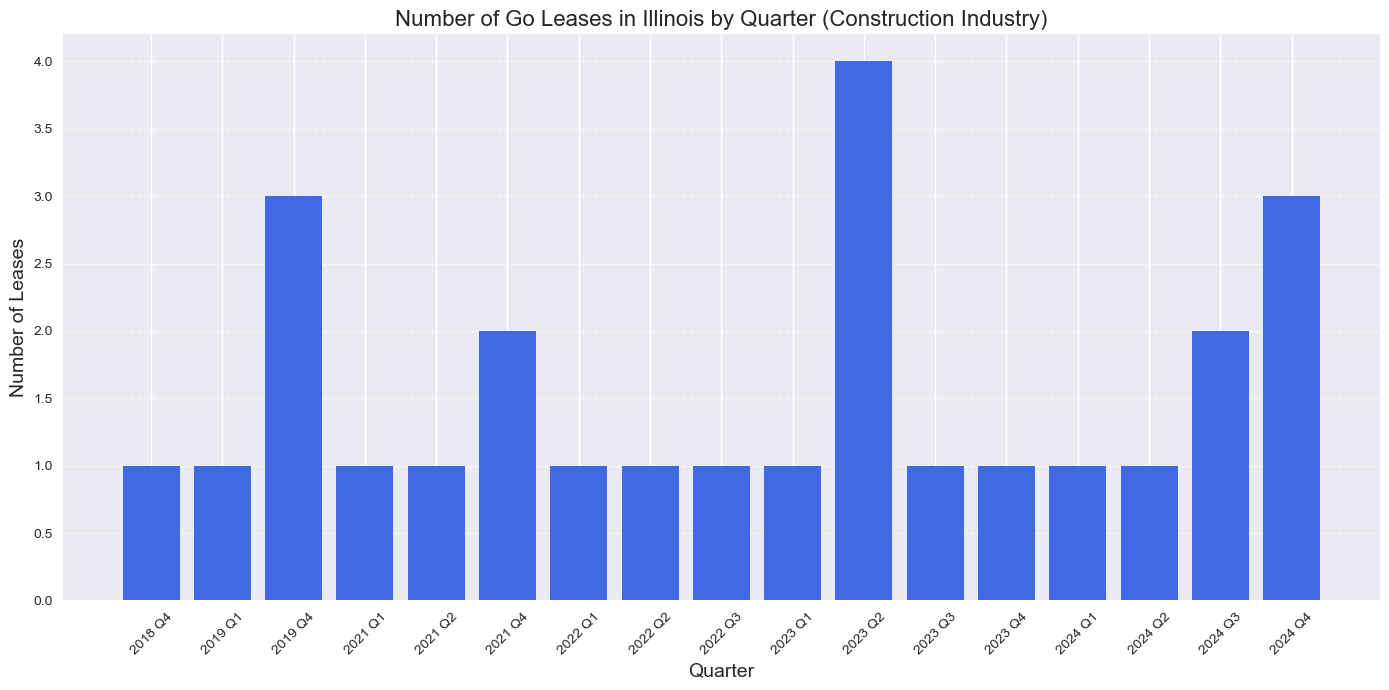

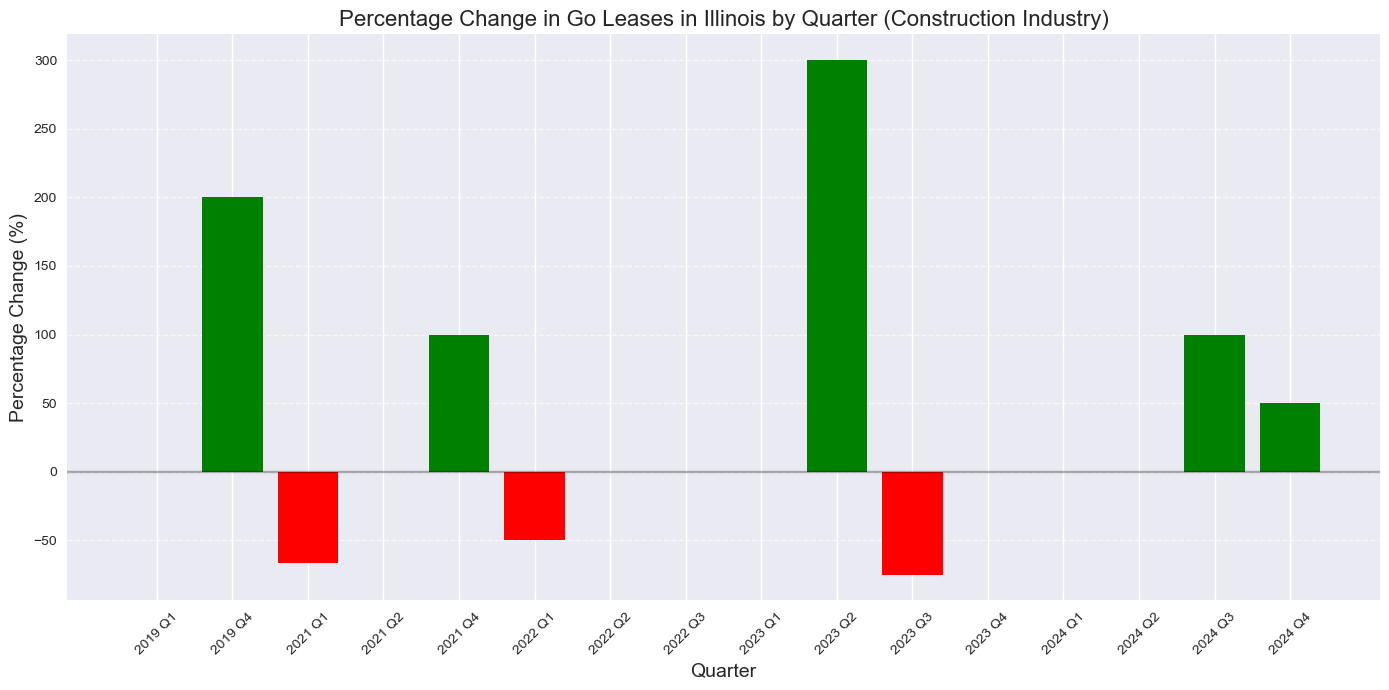


Percentage change in Go leases by quarter in IL (Construction Industry):
time_period  count pct_change
    2018 Q4      1        NaN
    2019 Q1      1       0.0%
    2019 Q4      3     200.0%
    2021 Q1      1     -66.7%
    2021 Q2      1       0.0%
    2021 Q4      2     100.0%
    2022 Q1      1     -50.0%
    2022 Q2      1       0.0%
    2022 Q3      1       0.0%
    2023 Q1      1       0.0%
    2023 Q2      4     300.0%
    2023 Q3      1     -75.0%
    2023 Q4      1       0.0%
    2024 Q1      1       0.0%
    2024 Q2      1       0.0%
    2024 Q3      2     100.0%
    2024 Q4      3      50.0%


In [22]:
# Filter for Go leases in Illinois in the Construction industry
il_go_data = focused_lease[(focused_lease["transaction_category"] == "Go") & 
                          (focused_lease["state"] == "IL") &
                          (focused_lease["internal_industry"] == "Construction, Engineering and Architecture")].copy()

# Create time period for sorting and display
il_go_data['time_period'] = il_go_data['year'].astype(str) + ' ' + il_go_data['quarter'].astype(str)

# Summary information
print(f"Total Go leases in IL (Construction industry): {len(il_go_data)}")

# Count leases by quarter
il_go_counts = il_go_data.groupby(['year', 'quarter', 'time_period']).size().reset_index(name='count')
il_go_counts = il_go_counts.sort_values(['year', 'quarter'])

# Plot the trend
plt.figure(figsize=(14, 7))
plt.plot(il_go_counts['time_period'], il_go_counts['count'], marker='o', linewidth=2, color='royalblue')
plt.title('Number of Go Leases in Illinois by Quarter (Construction Industry)', fontsize=16)
plt.xlabel('Quarter', fontsize=14)
plt.ylabel('Number of Leases', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Bar chart version
plt.figure(figsize=(14, 7))
plt.bar(il_go_counts['time_period'], il_go_counts['count'], color='royalblue')
plt.title('Number of Go Leases in Illinois by Quarter (Construction Industry)', fontsize=16)
plt.xlabel('Quarter', fontsize=14)
plt.ylabel('Number of Leases', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Calculate percentage change
if len(il_go_counts) > 1:
    il_go_counts['pct_change'] = il_go_counts['count'].pct_change() * 100
    
    plt.figure(figsize=(14, 7))
    plt.bar(il_go_counts['time_period'][1:], il_go_counts['pct_change'][1:], 
            color=il_go_counts['pct_change'][1:].map(lambda x: 'green' if x >= 0 else 'red'))
    plt.title('Percentage Change in Go Leases in Illinois by Quarter (Construction Industry)', fontsize=16)
    plt.xlabel('Quarter', fontsize=14)
    plt.ylabel('Percentage Change (%)', fontsize=14)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print("\nPercentage change in Go leases by quarter in IL (Construction Industry):")
    print(il_go_counts[['time_period', 'count', 'pct_change']].to_string(index=False, 
                                                                       formatters={'pct_change': '{:.1f}%'.format}))